Q-learning for policyIII

In [1]:
import numpy as np
import random
from random import sample
import math 
import matplotlib.pyplot as plt

In [2]:
def reset1():
    st= [0]*17
    return tuple(st)

In [3]:
weibull_scale=(2365.08,996.88,713.55,1406.84,343.76,3933.12,828.19,2040.95)
weibull_shape=(414.16,109.25,79.81,115.21,169.81,143.60,43.83,296.48)
tf=(2,6.5,2.5,6,5,3.5,3,3.5)
tp=(0.4,5.42,0.625,0.857,1.25,0.7,0.429,0.875)
time_interval=5
running_time=100000

In [4]:
sum(tp)

10.556

optimal replacement time for tire

In [5]:
def step0(action,st,i,step): 
    f = random.weibullvariate(weibull_scale[i],weibull_shape[i])
    if step!=2500 :
        
        st[8]=0 #no scheduled overhaul
        if action == 0 :
            st[i] +=5 #age 
        
            if f <= st[i]:
                st[i+9]=1    
            else:
                st[i+9]=0 
        
        if action ==1 :
            st[i]=0
            st[i+9]=0
            
    else:
        for j in range(17):
            st[j] = 0
        st[8]=1 #scheduled overhaul   
    return tuple(st)
                                

In [6]:
step0(0,list((500,5,2,5,8,41,2,8,85,42,1,25,14,35,12,24,0)),0,2500)

(0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0)

In [7]:
def rewardfun0(action,st,i) :
    reward =[]

    if (action ==1 and st[8]==0) :
        reward= -(time_interval / tp[i])*tp[i] 
        
    if (st[i+9]==1 and action == 0 and st[8] == 0 ):
        reward= -(time_interval / tp[i])*time_interval * math.ceil(tf[i]/time_interval)
    
    if (st[8] == 1):
        reward= -(time_interval / tp[i])*time_interval * math.ceil(0.8 *sum(tp)/time_interval) 
             
    if (st[i+9]==0 and action == 0 and st[8] == 0 ):
        reward = 5
    return reward
    

In [8]:
rewardfun0(1,list((500,5,2,5,8,41,2,8,0,1,1,25,14,35,12,24,0)),0)

-5.0

In [9]:
sd= (500,5,2,5,8,41,2,8,0,1,1,25,14,35,12,24,0)
se=(sd[1],sd[2])
se

(5, 2)

In [10]:
num_episodes=1000
min_lr=0.1 
min_epsilon=0.1
discount=0.9
decay=25

In [11]:
def choose_action(epsilon, state,i):
    if (state[i+9]==1):
        return 1
    else:
        if (np.random.random() < epsilon):
            return random.choice([0,1]) 
        else:
            st=(state[i],state[i+9])
            return np.argmax(Q_table[st])
            

In [12]:
def get_learning_rate( t):
    
    """Gets value for learning rate. It declines as we advance in episodes."""
    # Learning rate also declines as we add more episodes
    return max(min_lr, min(1., 1. - math.log10((t + 1) / decay)))


Tire

In [21]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
i=0
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
    step = 0        
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs = step0(action , list(current_state),i,step)
        reward = rewardfun0(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
        step +=5 
    
    scores.append(sum(rewards))


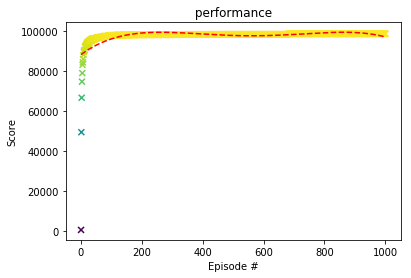

In [22]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance ')
plt.show()
     

In [23]:
optimal =[]
current_state = reset1()
step = 0
i=0

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step0(action , list(current_state),i,step)
    reward = rewardfun0(action,current_state,i)
    current_state = obs
    step +=5
np.unique(optimal)[0]

920

transmission

In [24]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
i=1
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
    step = 0        
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs = step0(action , list(current_state),i,step)
        reward = rewardfun0(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
        step +=5 
    
    scores.append(sum(rewards))


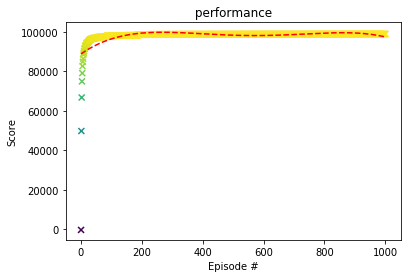

In [25]:
# Plot the policy performance
fig = plt.figure()
ax = fig.add_subplot(111)
x = np.arange(1, len(scores) + 1)
y = scores
plt.scatter(x, y, marker='x', c=y)
fit = np.polyfit(x, y, deg=4)
p = np.poly1d(fit) 
plt.plot(x,p(x),"r--") 
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.title(' performance ')
plt.show()
     

In [26]:
optimal =[]
current_state = reset1()
step = 0
i=1

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step0(action , list(current_state),i,step)
    reward = rewardfun0(action,current_state,i)
    current_state = obs
    step +=5
np.unique(optimal)[0]

910

wheel rim

In [35]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
i=2
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
    step = 0        
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs = step0(action , list(current_state),i,step)
        reward = rewardfun0(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
        step +=5 
    
    scores.append(sum(rewards))


In [37]:
optimal =[]
current_state = reset1()
step = 0
i=2

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step0(action , list(current_state),i,step)
    reward = rewardfun0(action,current_state,i)
    current_state = obs
    step +=5
np.unique(optimal)[0]

660

coupling

In [15]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
i=3
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
    step = 0        
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs = step0(action , list(current_state),i,step)
        reward = rewardfun0(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
        step +=5 
    
    scores.append(sum(rewards))


In [16]:
optimal =[]
current_state = reset1()
step = 0
i=3

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step0(action , list(current_state),i,step)
    reward = rewardfun0(action,current_state,i)
    current_state = obs
    step +=5
np.unique(optimal)[0]

890

Motor

In [22]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
i=4
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
    step = 0        
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs = step0(action , list(current_state),i,step)
        reward = rewardfun0(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
        step +=5 
    
    scores.append(sum(rewards))


In [25]:
optimal =[]
current_state = reset1()
step = 0
i=4

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step0(action , list(current_state),i,step)
    reward = rewardfun0(action,current_state,i)
    current_state = obs
    step +=5
np.unique(optimal)[0]

335

Brake

In [17]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
i=5
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
    step = 0        
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs = step0(action , list(current_state),i,step)
        reward = rewardfun0(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
        step +=5 
    
    scores.append(sum(rewards))


In [18]:
optimal =[]
current_state = reset1()
step = 0
i=5

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step0(action , list(current_state),i,step)
    reward = rewardfun0(action,current_state,i)
    current_state = obs
    step +=5
np.unique(optimal)[0]

745

Steering Wheel

In [18]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
i=6
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
    step = 0        
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs = step0(action , list(current_state),i,step)
        reward = rewardfun0(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
        step +=5 
    
    scores.append(sum(rewards))


In [19]:
optimal =[]
current_state = reset1()
step = 0
i=6

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step0(action , list(current_state),i,step)
    reward = rewardfun0(action,current_state,i)
    current_state = obs
    step +=5
np.unique(optimal)[0]

710

Shifting gears

In [20]:
Q_table = np.zeros((100000 ,2) + (2,))
scores = []
i=7
# Looping for each episode
for e in range(1000):
    # Initializes the state
    current_state = reset1()
    rewards = []
    learning_rate = get_learning_rate(e)
    epsilon = 1/(e +1)
            
    step = 0        
    # Looping for each step
    for j in range(running_time//time_interval):
        # Choose A from S
        action = choose_action(epsilon,current_state , i)
        # Take action
        obs = step0(action , list(current_state),i,step)
        reward = rewardfun0(action,current_state,i)
        rewards.append(reward)
        new_state = obs
        
        current_statei = (current_state[i],current_state[i+9])
        new_statei = (new_state[i],new_state[i+9])
        # Update Q(S,A)
        Q_table[current_statei][action] += (learning_rate * 
                                        (reward 
                                         + discount * np.max(Q_table[new_statei]) 
                                         - Q_table[current_statei][action]))
        current_state = new_state
        step +=5 
    
    scores.append(sum(rewards))


In [21]:
optimal =[]
current_state = reset1()
step = 0
i=7

for j in range(running_time//time_interval):
    # Choose A from S
    action = np.argmax(Q_table[(current_state[i],current_state[i+9])])
    if action==1:
        optimal.append(current_state[i])
    # Take action
    obs = step0(action , list(current_state),i,step)
    reward = rewardfun0(action,current_state,i)
    current_state = obs
    step +=5
np.unique(optimal)[0]

685